#**Fully connected neural networks applied in Fashion MNIST recognition of clothing**

In [61]:
import keras

#catgar el conjunto de datos Fashion MNIST
fmnist = keras.datasets.fashion_mnist

In [62]:
#Cargue la division de entrenamiento y prueba del conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

Label: 0
Image: [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

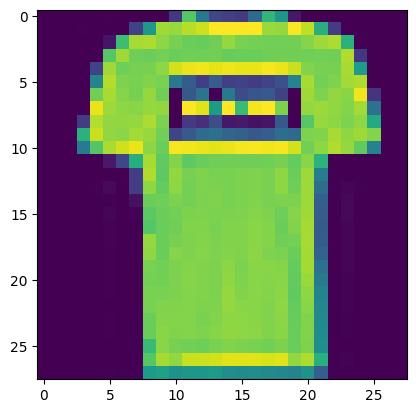

In [63]:
#Visualización de una muestra
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Entre 0 y 59999
index = 1

#Imprie la etiqueta y la imgane
np.set_printoptions(linewidth = 320)
print(f'Label: {training_labels[index]}')
print(f'Image: {training_images[index]}')


#Visualiza la imagen
plt.imshow(training_images[index])


In [64]:
#Normalizar los valores de pixeles del tren y probar las imagenes
training_images = training_images/255.0
test_images = test_images/255.0

In [65]:
#Construir el modelo de clasificacion
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                                keras.layers.Dense(128, activation = 'relu'),
                                keras.layers.Dense(10, activation = 'softmax')
                                ])

In [68]:
#Compilar el modelo
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
#Entrenar modelo
history = model.fit(training_images, training_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4999 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3762 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3380 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3137 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2969 - accuracy: 0.8884
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2823 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2690 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2577 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2496 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.238

<Axes: >

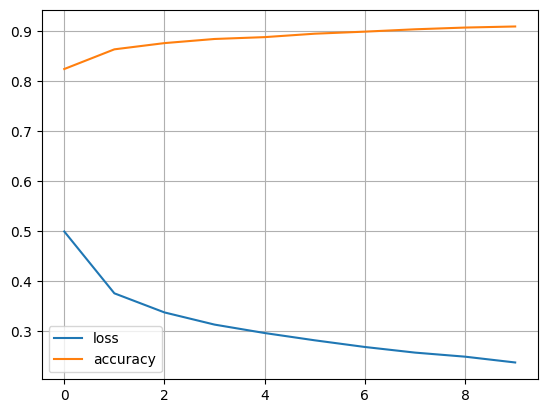

In [70]:
#Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

In [71]:
#Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print(f'Pérdida en el conjunto de entrenamiento {loss}')
print(f'Precisión en el conjunto de entrenamiento {accuracy}')

#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Pérdida en el conjunto de entrenamiento {loss}')
print(f'Precisión en el conjunto de entrenamiento {accuracy}')


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2325 - accuracy: 0.9127
Pérdida en el conjunto de entrenamiento 0.23251405358314514
Precisión en el conjunto de entrenamiento 0.9127333164215088
313/313 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.8815
Pérdida en el conjunto de entrenamiento 0.34502509236335754
Precisión en el conjunto de entrenamiento 0.8815000057220459


In [72]:
#Predict
index = 1
print(f'label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification: \n {classification.reshape(-1, 1)}')

label: 2
1/1 [==============================] - 0s 89ms/step
Classification: 
 [[3.3437443e-06]
 [1.1843639e-13]
 [9.9821067e-01]
 [1.1866420e-11]
 [1.7278508e-03]
 [1.7698829e-15]
 [5.8162674e-05]
 [1.5606654e-15]
 [1.6223080e-09]
 [3.2054691e-14]]
